# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [59]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Traffic Data.csv        


In [60]:
df = pd.read_csv('Traffic Data.csv')
print(df.head())

   traffic_volume    temp  rain_1h  snow_1h  clouds_all weather_main  \
0          1209.0  291.15      0.0      0.0          90         Mist   
1          1248.0  286.01      0.0      0.0           1        Clear   
2          4602.0  293.69      0.0      0.0          75       Clouds   
3          2838.0  262.35      0.0      0.0           1        Clear   
4          5794.0  267.08      0.0      0.0           5        Clear   

  weather_description            date_time  
0                mist  2017-08-27 01:00:00  
1        sky is clear  2018-09-06 23:00:00  
2       broken clouds  2017-08-25 18:00:00  
3        sky is clear  2017-11-09 22:00:00  
4        sky is clear  2017-11-09 15:00:00  


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [62]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [63]:
df.set_index('date_time', inplace=True)

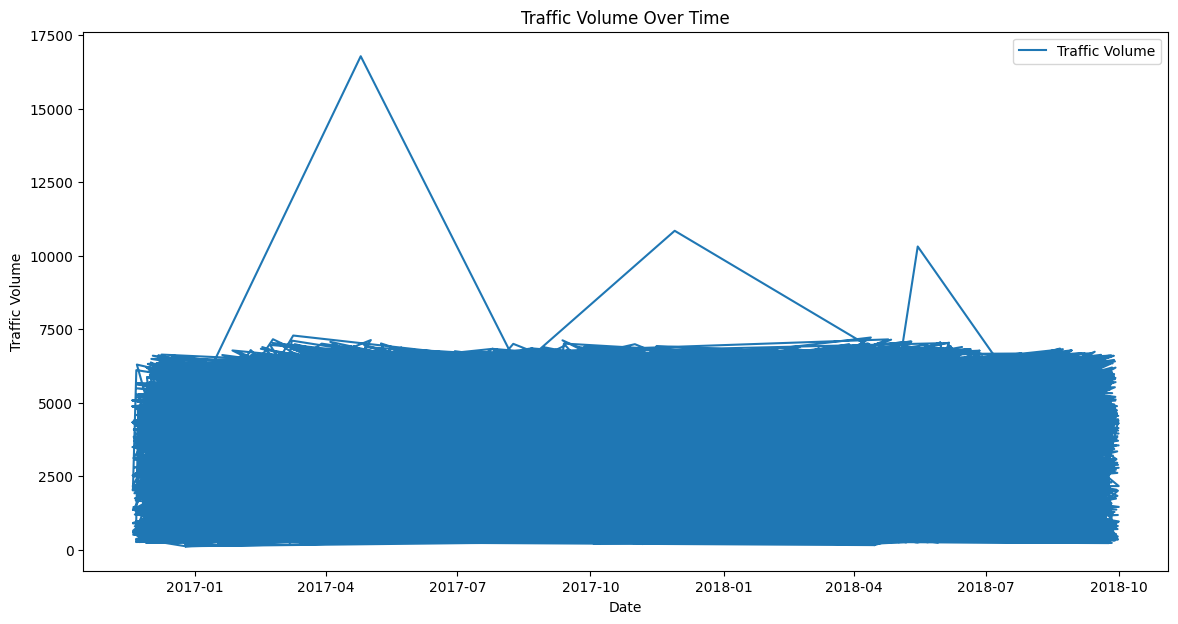

In [64]:
plt.figure(figsize=(14, 7))
plt.plot(df['traffic_volume'], label='Traffic Volume')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

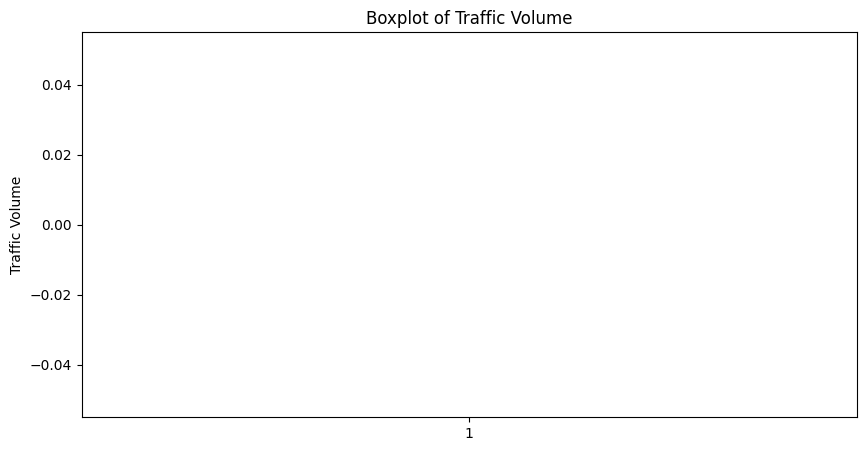

In [66]:
plt.figure(figsize=(10, 5))
plt.boxplot(df['traffic_volume'])
plt.title('Boxplot of Traffic Volume')
plt.ylabel('Traffic Volume')
plt.show()

In [67]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation = numeric_columns.corr()
print(correlation)


                traffic_volume      temp   rain_1h  snow_1h  clouds_all
traffic_volume        1.000000  0.132268  0.012803      NaN    0.094228
temp                  0.132268  1.000000  0.100254      NaN   -0.032767
rain_1h               0.012803  0.100254  1.000000      NaN    0.074927
snow_1h                    NaN       NaN       NaN      NaN         NaN
clouds_all            0.094228 -0.032767  0.074927      NaN    1.000000


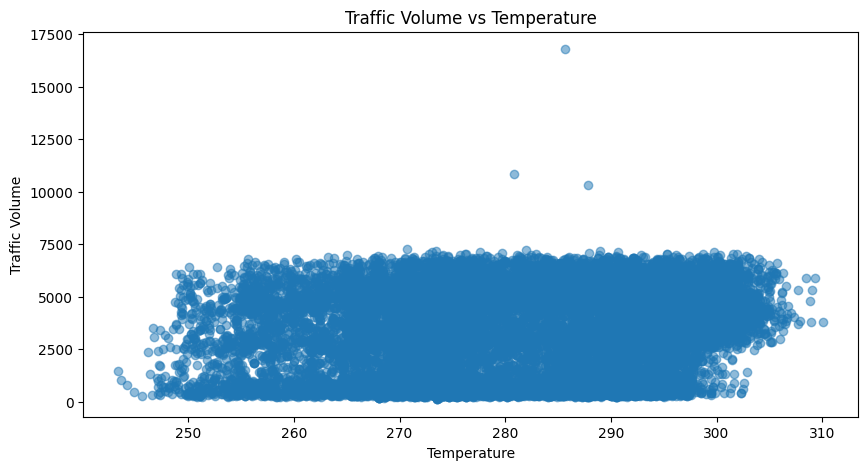

In [68]:
plt.figure(figsize=(10, 5))
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()


In [69]:
df_encoded = pd.get_dummies(df, columns=['weather_main', 'weather_description'])

correlation = df_encoded.corr()
print(correlation)


                                                    traffic_volume      temp  \
traffic_volume                                            1.000000  0.132268   
temp                                                      0.132268  1.000000   
rain_1h                                                   0.012803  0.100254   
snow_1h                                                        NaN       NaN   
clouds_all                                                0.094228 -0.032767   
weather_main_Clear                                       -0.088036 -0.075627   
weather_main_Clouds                                       0.181453  0.112073   
weather_main_Drizzle                                      0.000504  0.051004   
weather_main_Fog                                         -0.046745 -0.021460   
weather_main_Haze                                         0.004766 -0.087953   
weather_main_Mist                                        -0.074800 -0.051959   
weather_main_Rain                       

In [70]:
correlation = df.corr()
print(correlation)

plt.figure(figsize=(10, 5))
plt.scatter(df['temp'], df['traffic_volume'], alpha=0.5)
plt.title('Traffic Volume vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

ValueError: could not convert string to float: 'Mist'

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [71]:
print(df.isnull().sum())

traffic_volume         20
temp                    0
rain_1h                 0
snow_1h                 0
clouds_all              0
weather_main            0
weather_description     0
dtype: int64


In [72]:
missing_values = df['traffic_volume'].isnull().sum()

In [73]:
df['traffic_volume'].fillna(method='ffill', inplace=True)

<ipython-input-73-00956f0c7949>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['traffic_volume'].fillna(method='ffill', inplace=True)


In [74]:
df.dropna(subset=['traffic_volume'], inplace=True)

In [75]:
df = df.sort_index()

In [76]:
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['traffic_volume', 'temp', 'rain_1h', 'clouds_all']] = scaler.fit_transform(df[['traffic_volume', 'temp', 'rain_1h', 'clouds_all']])

In [78]:
print(df.head())
print(df.isnull().sum())

                     traffic_volume      temp  rain_1h  snow_1h  clouds_all  \
date_time                                                                     
2016-11-18 15:00:00        0.285517  0.460258      0.0      0.0    0.978261   
2016-11-18 15:00:00        0.285517  0.460258      0.0      0.0    0.978261   
2016-11-18 15:00:00        0.285517  0.460258      0.0      0.0    0.978261   
2016-11-18 16:00:00        0.297636  0.456659      0.0      0.0    0.978261   
2016-11-18 16:00:00        0.297636  0.456659      0.0      0.0    0.978261   

                    weather_main weather_description  traffic_volume_lag1  
date_time                                                                  
2016-11-18 15:00:00         Snow          heavy snow                  NaN  
2016-11-18 15:00:00          Fog                 fog               4872.0  
2016-11-18 15:00:00         Mist                mist               4872.0  
2016-11-18 16:00:00          Fog                 fog              

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [79]:
df['traffic_volume_lag1'] = df['traffic_volume'].shift(1)

In [80]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(24)

In [81]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()

In [89]:
df['day_of_week'] = df['date_time'].dt.day_of_week

df['month'] = df['date_time'].dt.month

df['day_of_year'] = df['date_time'].dt.dayofyear

KeyError: 'date_time'

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [83]:
train_ra = 0.8
split_index = int(len(df) * train_ra)
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 16000
Testing set size: 4000


## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [84]:
from sklearn.preprocessing import MinMaxScaler

columns_to_exclude = ['traffic_volume', 'weather_main', 'weather_description']

train_features = train_df.drop(columns=columns_to_exclude)
test_features = test_df.drop(columns=columns_to_exclude)

scaler = MinMaxScaler()
scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

scaled_train_df = pd.DataFrame(scaled_train_features, columns=train_features.columns)
scaled_test_df = pd.DataFrame(scaled_test_features, columns=test_features.columns)

scaled_train_df['traffic_volume'] = train_df['traffic_volume'].values
scaled_test_df['traffic_volume'] = test_df['traffic_volume'].values

scaled_train_df = scaled_train_df.reset_index(drop=True)
scaled_test_df = scaled_test_df.reset_index(drop=True)

print(scaled_train_df.head())
print(scaled_test_df.head())


       temp  rain_1h  snow_1h  clouds_all  traffic_volume_lag1  \
0  0.482320      0.0      0.0    0.978261                  NaN   
1  0.482320      0.0      0.0    0.978261             0.285517   
2  0.482320      0.0      0.0    0.978261             0.285517   
3  0.478548      0.0      0.0    0.978261             0.285517   
4  0.478548      0.0      0.0    0.978261             0.297636   

   prev_traffic_volume  traffic_volume_diff  traffic_volume  
0                  NaN                  NaN        0.285517  
1                  NaN             0.474016        0.285517  
2                  NaN             0.474016        0.285517  
3                  NaN             0.483534        0.297636  
4                  NaN             0.474016        0.297636  
       temp  rain_1h  snow_1h  clouds_all  traffic_volume_lag1  \
0  0.787679      0.0      0.0    0.815217             0.078414   
1  0.775263      0.0      0.0    0.815217             0.044516   
2  0.768348      0.0      0.0    

In [100]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,prev_traffic_volume,traffic_volume_diff
date_time,,,,,,,,,,
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Snow,heavy snow,NaN,NaN,NaN
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Fog,fog,0.285517,NaN,0.000000
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Mist,mist,0.285517,NaN,0.000000
2016-11-18 16:00:00,0.297636,0.456659,0.0,0.0,0.978261,Fog,fog,0.285517,NaN,0.012119
2016-11-18 16:00:00,0.297636,0.456659,0.0,0.0,0.978261,Mist,mist,0.297636,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0.205784,0.600780,0.0,0.0,0.815217,Clouds,broken clouds,0.230022,0.170206,-0.024238
2018-09-30 20:00:00,0.160067,0.590432,0.0,0.0,0.978261,Clouds,overcast clouds,0.205784,0.149628,-0.045716
2018-09-30 21:00:00,0.122750,0.589982,0.0,0.0,0.978261,Thunderstorm,proximity thunderstorm,0.160067,0.224562,-0.037317


In [86]:
print(train_df.columns.str.strip())
print(test_df.columns.str.strip())


Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume_lag1',
       'prev_traffic_volume', 'traffic_volume_diff'],
      dtype='object')
Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'traffic_volume_lag1',
       'prev_traffic_volume', 'traffic_volume_diff'],
      dtype='object')


In [93]:
train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [101]:
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume_lag1,prev_traffic_volume,traffic_volume_diff
date_time,,,,,,,,,,
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Snow,heavy snow,NaN,NaN,NaN
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Fog,fog,0.285517,NaN,0.000000
2016-11-18 15:00:00,0.285517,0.460258,0.0,0.0,0.978261,Mist,mist,0.285517,NaN,0.000000
2016-11-18 16:00:00,0.297636,0.456659,0.0,0.0,0.978261,Fog,fog,0.285517,NaN,0.012119
2016-11-18 16:00:00,0.297636,0.456659,0.0,0.0,0.978261,Mist,mist,0.297636,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,0.205784,0.600780,0.0,0.0,0.815217,Clouds,broken clouds,0.230022,0.170206,-0.024238
2018-09-30 20:00:00,0.160067,0.590432,0.0,0.0,0.978261,Clouds,overcast clouds,0.205784,0.149628,-0.045716
2018-09-30 21:00:00,0.122750,0.589982,0.0,0.0,0.978261,Thunderstorm,proximity thunderstorm,0.160067,0.224562,-0.037317


In [95]:
print(train_features.dtypes)

temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all             float64
weather_main            object
weather_description     object
traffic_volume_lag1    float64
prev_traffic_volume    float64
traffic_volume_diff    float64
dtype: object


In [102]:
numeric_features = train_features.select_dtypes(include=['number']).columns

numeric_train_features = train_features[numeric_features]
numeric_test_features = test_features[numeric_features]

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_train_features = scaler.fit_transform(numeric_train_features)
scaled_test_features = scaler.transform(numeric_test_features)

scaled_train_df = pd.DataFrame(scaled_train_features, columns=numeric_train_features.columns)
scaled_test_df = pd.DataFrame(scaled_test_features, columns=numeric_test_features.columns)


In [104]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = train_features.select_dtypes(include=['object']).columns

categorical_train_features = train_features[categorical_features]
categorical_test_features = test_features[categorical_features]

encoder = OneHotEncoder(sparse=False, drop='first')
encoded_train_features = encoder.fit_transform(categorical_train_features)
encoded_test_features = encoder.transform(categorical_test_features)

encoded_train_df = pd.DataFrame(encoded_train_features, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_features))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [108]:
final_train_df = pd.concat([scaled_train_df, encoded_train_df], axis=1)
final_test_df = pd.concat([scaled_test_df, encoded_test_df], axis=1)


In [110]:
sample_train_features = numeric_train_features.head()
sample_test_features = numeric_test_features.head()

scaler = MinMaxScaler()
scaled_sample_train_features = scaler.fit_transform(sample_train_features)
scaled_sample_test_features = scaler.transform(sample_test_features)

print(scaled_sample_train_features)


[[ 1.  0.  0.  0. nan nan nan]
 [ 1.  0.  0.  0.  0. nan  0.]
 [ 1.  0.  0.  0.  0. nan  0.]
 [ 0.  0.  0.  0.  0. nan  1.]
 [ 0.  0.  0.  0.  1. nan  0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [111]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_features = train_df.drop(columns=['traffic_volume', 'date_time'])
test_features = test_df.drop(columns=['traffic_volume', 'date_time'])

scaled_train_features = scaler.fit_transform(train_features)
scaled_test_features = scaler.transform(test_features)

scaled_train_df = pd.DataFrame(scaled_train_features, columns=train_features.columns)
scaled_test_df = pd.DataFrame(scaled_test_features, columns=test_features.columns)


ValueError: could not convert string to float: 'Snow'

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [114]:
from statsmodels.tsa.arima.model import ARIMA
y = df['traffic_volume']

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [123]:
train_size = int(len(df) * 0.8)
train, test = df['traffic_volume'][:train_size], df['traffic_volume'][train_size:]

In [137]:
model = ARIMA(y, order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [119]:
forecast = model_fit.forecast(steps=24)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [124]:
train_forecast = model_fit.predict(start=train.index[0], end=train.index[-1])

In [125]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                20000
Model:                 ARIMA(5, 1, 0)   Log Likelihood               35140.416
Date:                Sun, 25 Aug 2024   AIC                         -70268.833
Time:                        07:05:07   BIC                         -70221.412
Sample:                             0   HQIC                        -70253.318
                              - 20000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4275      0.002    171.755      0.000       0.423       0.432
ar.L2          0.0235      0.004      5.853      0.000       0.016       0.031
ar.L3         -0.1054      0.007    -15.543      0.0

In [126]:
train_forecast = model_fit.predict(start=train.index[0], end=train.index[-1])

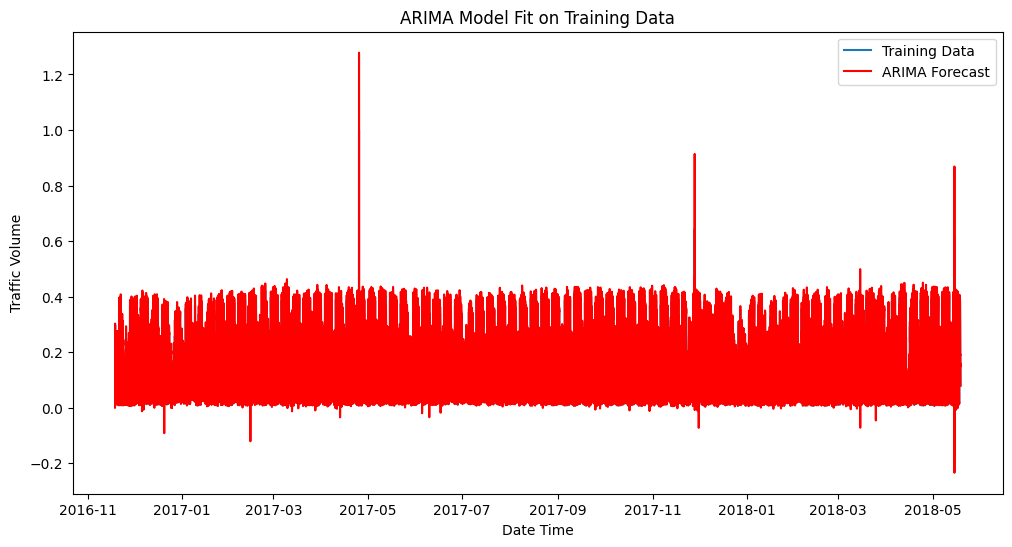

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(train.index, train_forecast, label='ARIMA Forecast', color='red')
plt.title('ARIMA Model Fit on Training Data')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [128]:
test_start = len(train)
test_end = len(train) + len(test) - 1
predictions = model_fit.predict(start=test_start, end=test_end, typ='levels')

In [129]:
predictions_df = pd.DataFrame({'date_time': test.index, 'predicted_traffic_volume': predictions})
predictions_df.set_index('date_time', inplace=True)

In [130]:
print(predictions_df.head())

                     predicted_traffic_volume
date_time                                    
2018-05-19 01:00:00                  0.067440
2018-05-19 02:00:00                  0.035874
2018-05-19 03:00:00                  0.027106
2018-05-19 04:00:00                  0.023184
2018-05-19 05:00:00                  0.022657


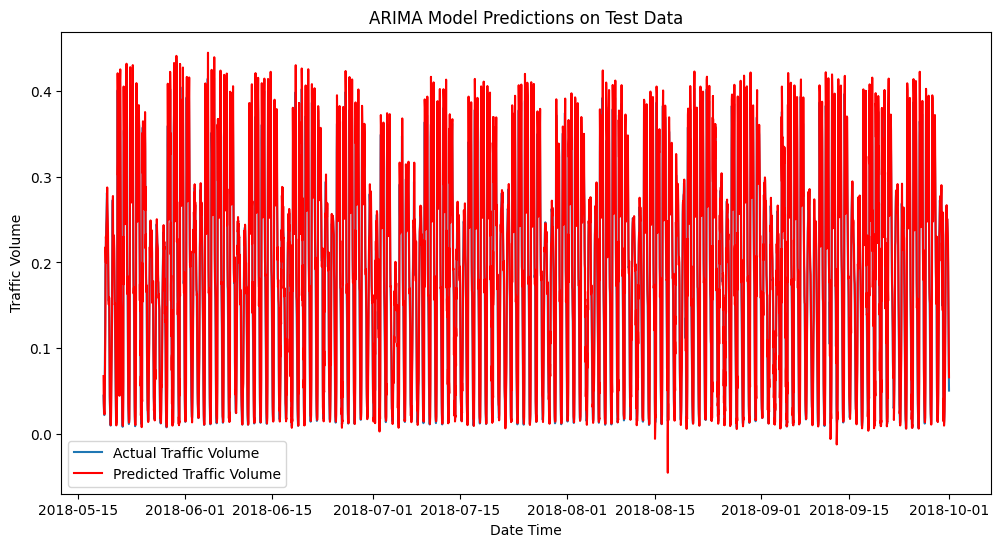

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Traffic Volume')
plt.plot(predictions_df.index, predictions_df['predicted_traffic_volume'], label='Predicted Traffic Volume', color='red')
plt.title('ARIMA Model Predictions on Test Data')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [133]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.0014360174007884924


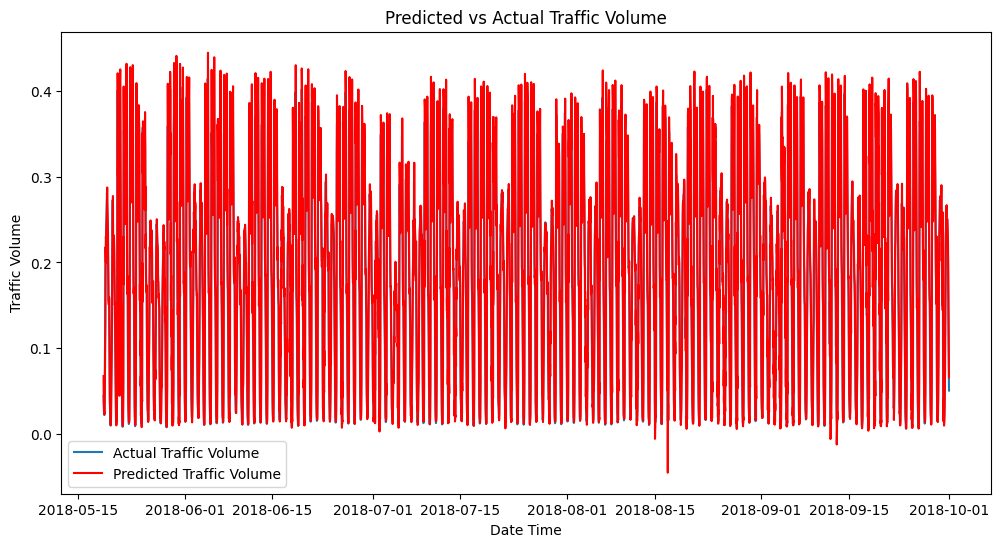

In [134]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Traffic Volume')
plt.plot(predictions_df.index, predictions_df['predicted_traffic_volume'], label='Predicted Traffic Volume', color='red')
plt.title('Predicted vs Actual Traffic Volume')
plt.xlabel('Date Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [141]:
traffic_volume = df['traffic_volume'].values

In [143]:
scaler = MinMaxScaler(feature_range=(0, 1))
traffic_volume_scaled = scaler.fit_transform(traffic_volume.reshape(-1, 1))

In [139]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [144]:
time_step = 10
X, y = create_dataset(traffic_volume_scaled, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [145]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [146]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [147]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [148]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0099 - val_loss: 0.0020
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 11/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 12/100
500/500 ━━━

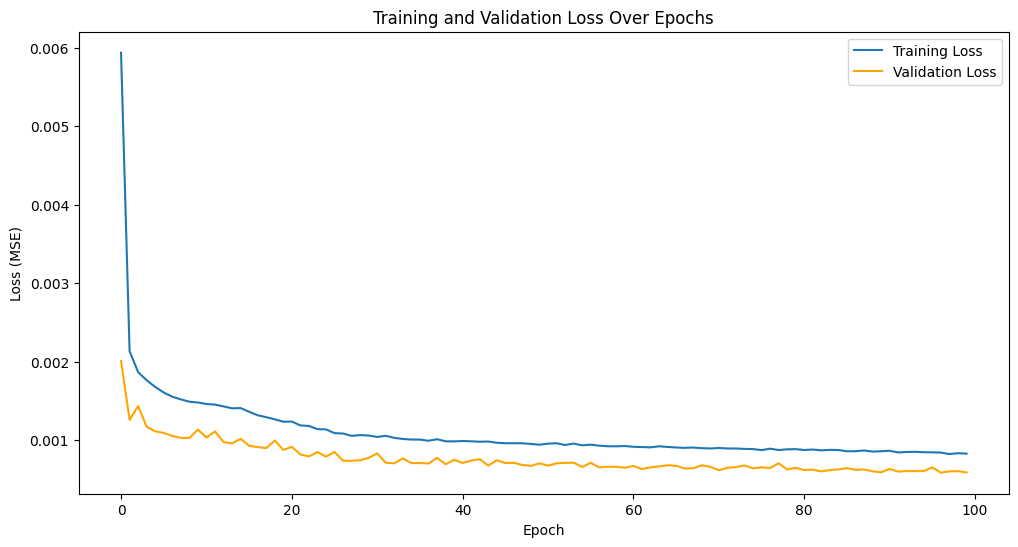

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [149]:
predictions = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [150]:
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [158]:
y_pred = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [159]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 0.0005903691445768608


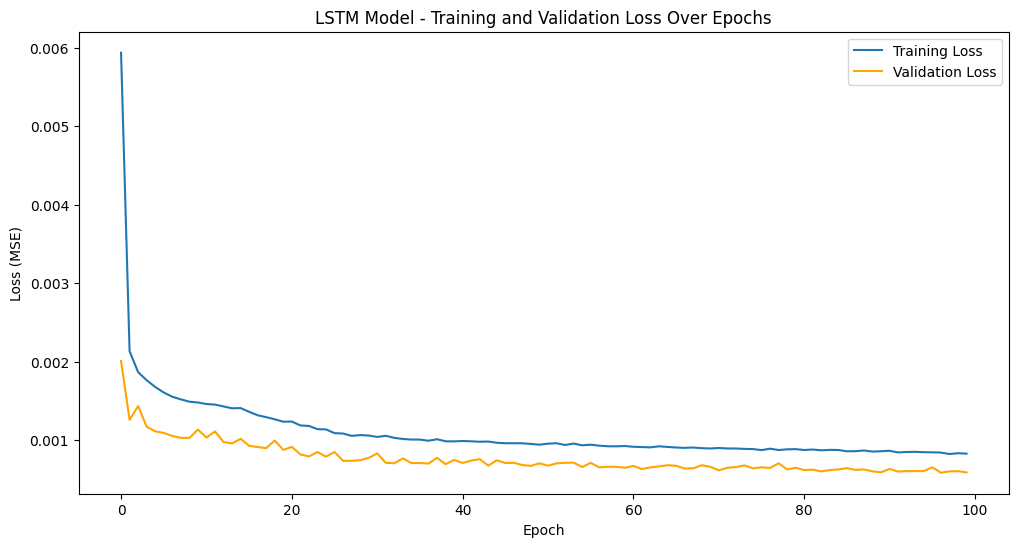

In [162]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Model - Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: